<Figure size 1500x18000 with 0 Axes>

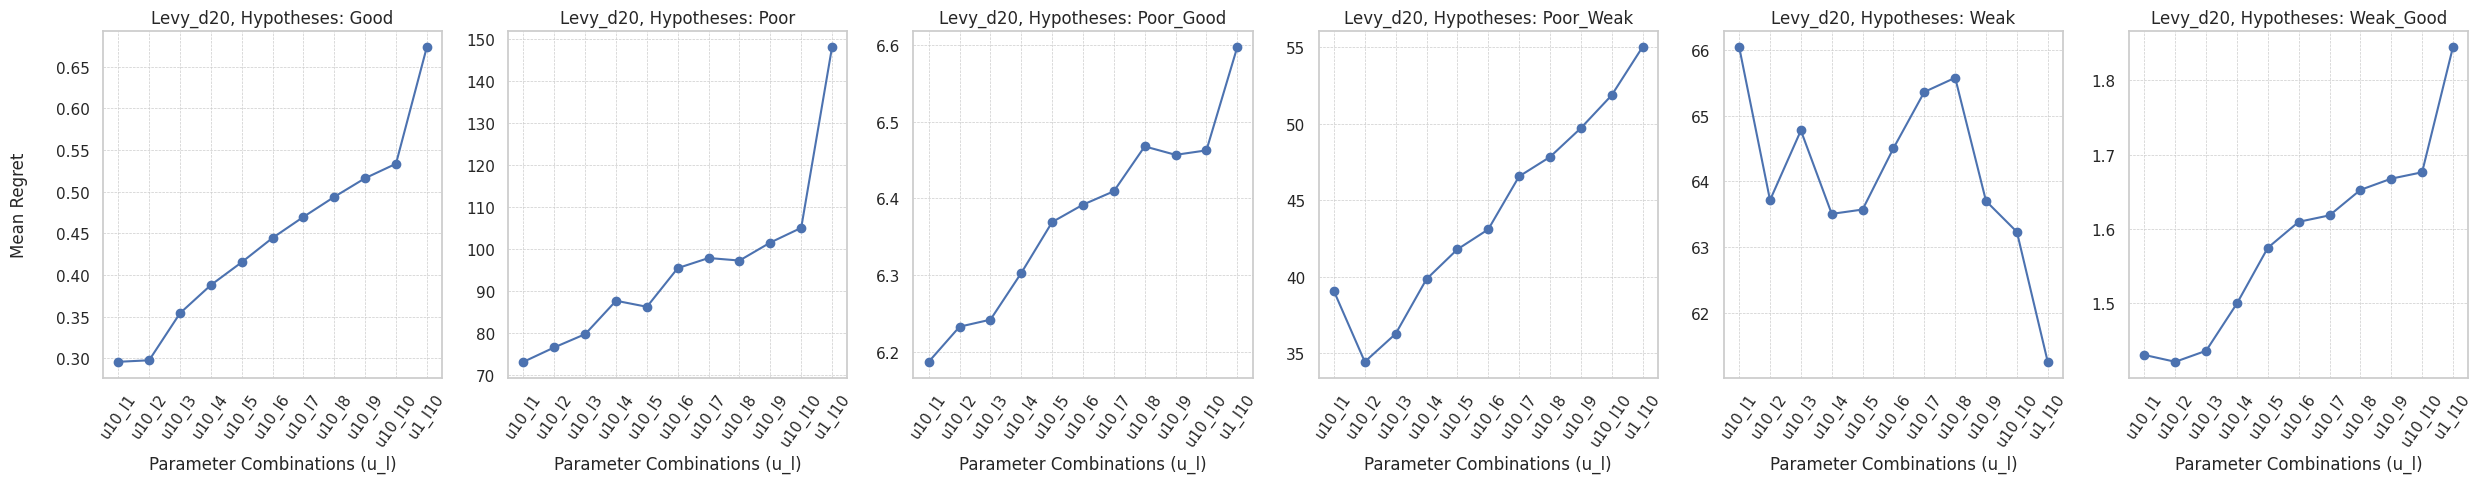

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Load the dataset
data_path = os.path.join("data", "ablation_studies", "all_results.csv")
data = pd.read_csv(data_path)

# Dropping the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in data.columns:
    data.drop(columns=['Unnamed: 0'], inplace=True)

# Grouping the data by 'Function' and 'Hypotheses'
grouped_data = data.groupby(['Function', 'Hypotheses'])

# Calculating the mean for each group
mean_performance = grouped_data.mean().reset_index()

# Setting up the visualization
sns.set(style="whitegrid")
num_plots = len(mean_performance['Function'].unique(
)) * len(mean_performance['Hypotheses'].unique())
plt.figure(figsize=(15, 5 * num_plots))

plot_num = 1

for function in mean_performance['Function'].unique():
    if "Levy" not in function:
        continue
    plt.figure(figsize=(25, 5))
    plot_num = 1
    for hypothesis in mean_performance['Hypotheses'].unique():
        subset = mean_performance[(mean_performance['Function'] == function) &
                                  (mean_performance['Hypotheses'] == hypothesis)]
        if not subset.empty:
            plt.subplot(
                1, len(mean_performance['Hypotheses'].unique()), plot_num)
            plt.title(f"{function}, Hypotheses: {hypothesis}")
            values = subset.values[:, 2:].flatten()
            plt.plot(subset.columns[2:], values, label=subset["Function"])
            # Add scatter dots to the plot
            plt.scatter(subset.columns[2:], values, marker='o')
            plt.xticks(rotation=55)
            plt.xlabel('Parameter Combinations (u_l)')
            if plot_num == 1:
                # Add labelpad to adjust the distance of the label from the y-axis
                plt.ylabel('Mean Regret', labelpad=20)
            # Set grid lines behind the lines
            plt.grid(True, linestyle='--', linewidth=0.5, zorder=0)
            plt.tight_layout()
            plot_num += 1

    plt.show()

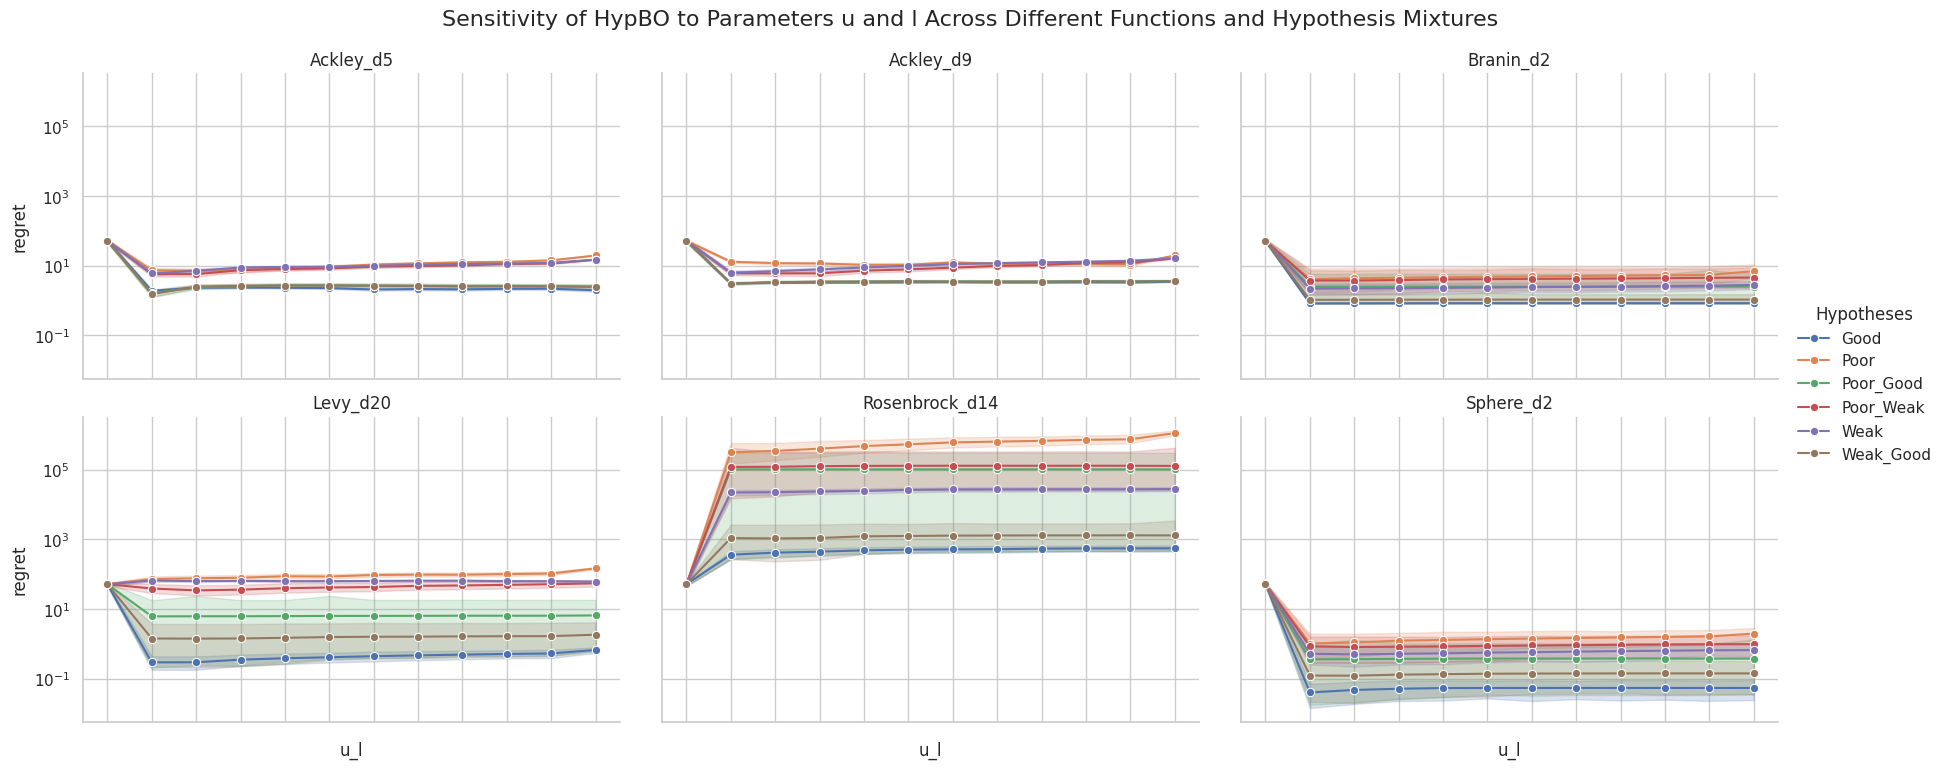

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset
data_path = os.path.join("data", "ablation_studies", "all_results.csv")
data = pd.read_csv(data_path)

# Preparing data for visualization
data_melted = data.melt(
    id_vars=['Function', 'Hypotheses'], var_name='u_l', value_name='regret')

# Creating a FacetGrid
g = sns.FacetGrid(data_melted, col="Function",
                  hue="Hypotheses", col_wrap=3, height=4, aspect=1.5)
g = g.map(sns.lineplot, "u_l", "regret", marker="o")

# Adjusting the details of the plot
g.set_xticklabels(rotation=45)
g.set(yscale='log')  # Using logarithmic scale
g.add_legend(title='Hypotheses')
g.set_titles('{col_name}')
g.fig.suptitle(
    'Sensitivity of HypBO to Parameters u and l Across Different Functions and Hypothesis Mixtures', fontsize=16)
g.fig.subplots_adjust(top=0.9)  # Adjusting the title location

# Displaying the plot
plt.show()

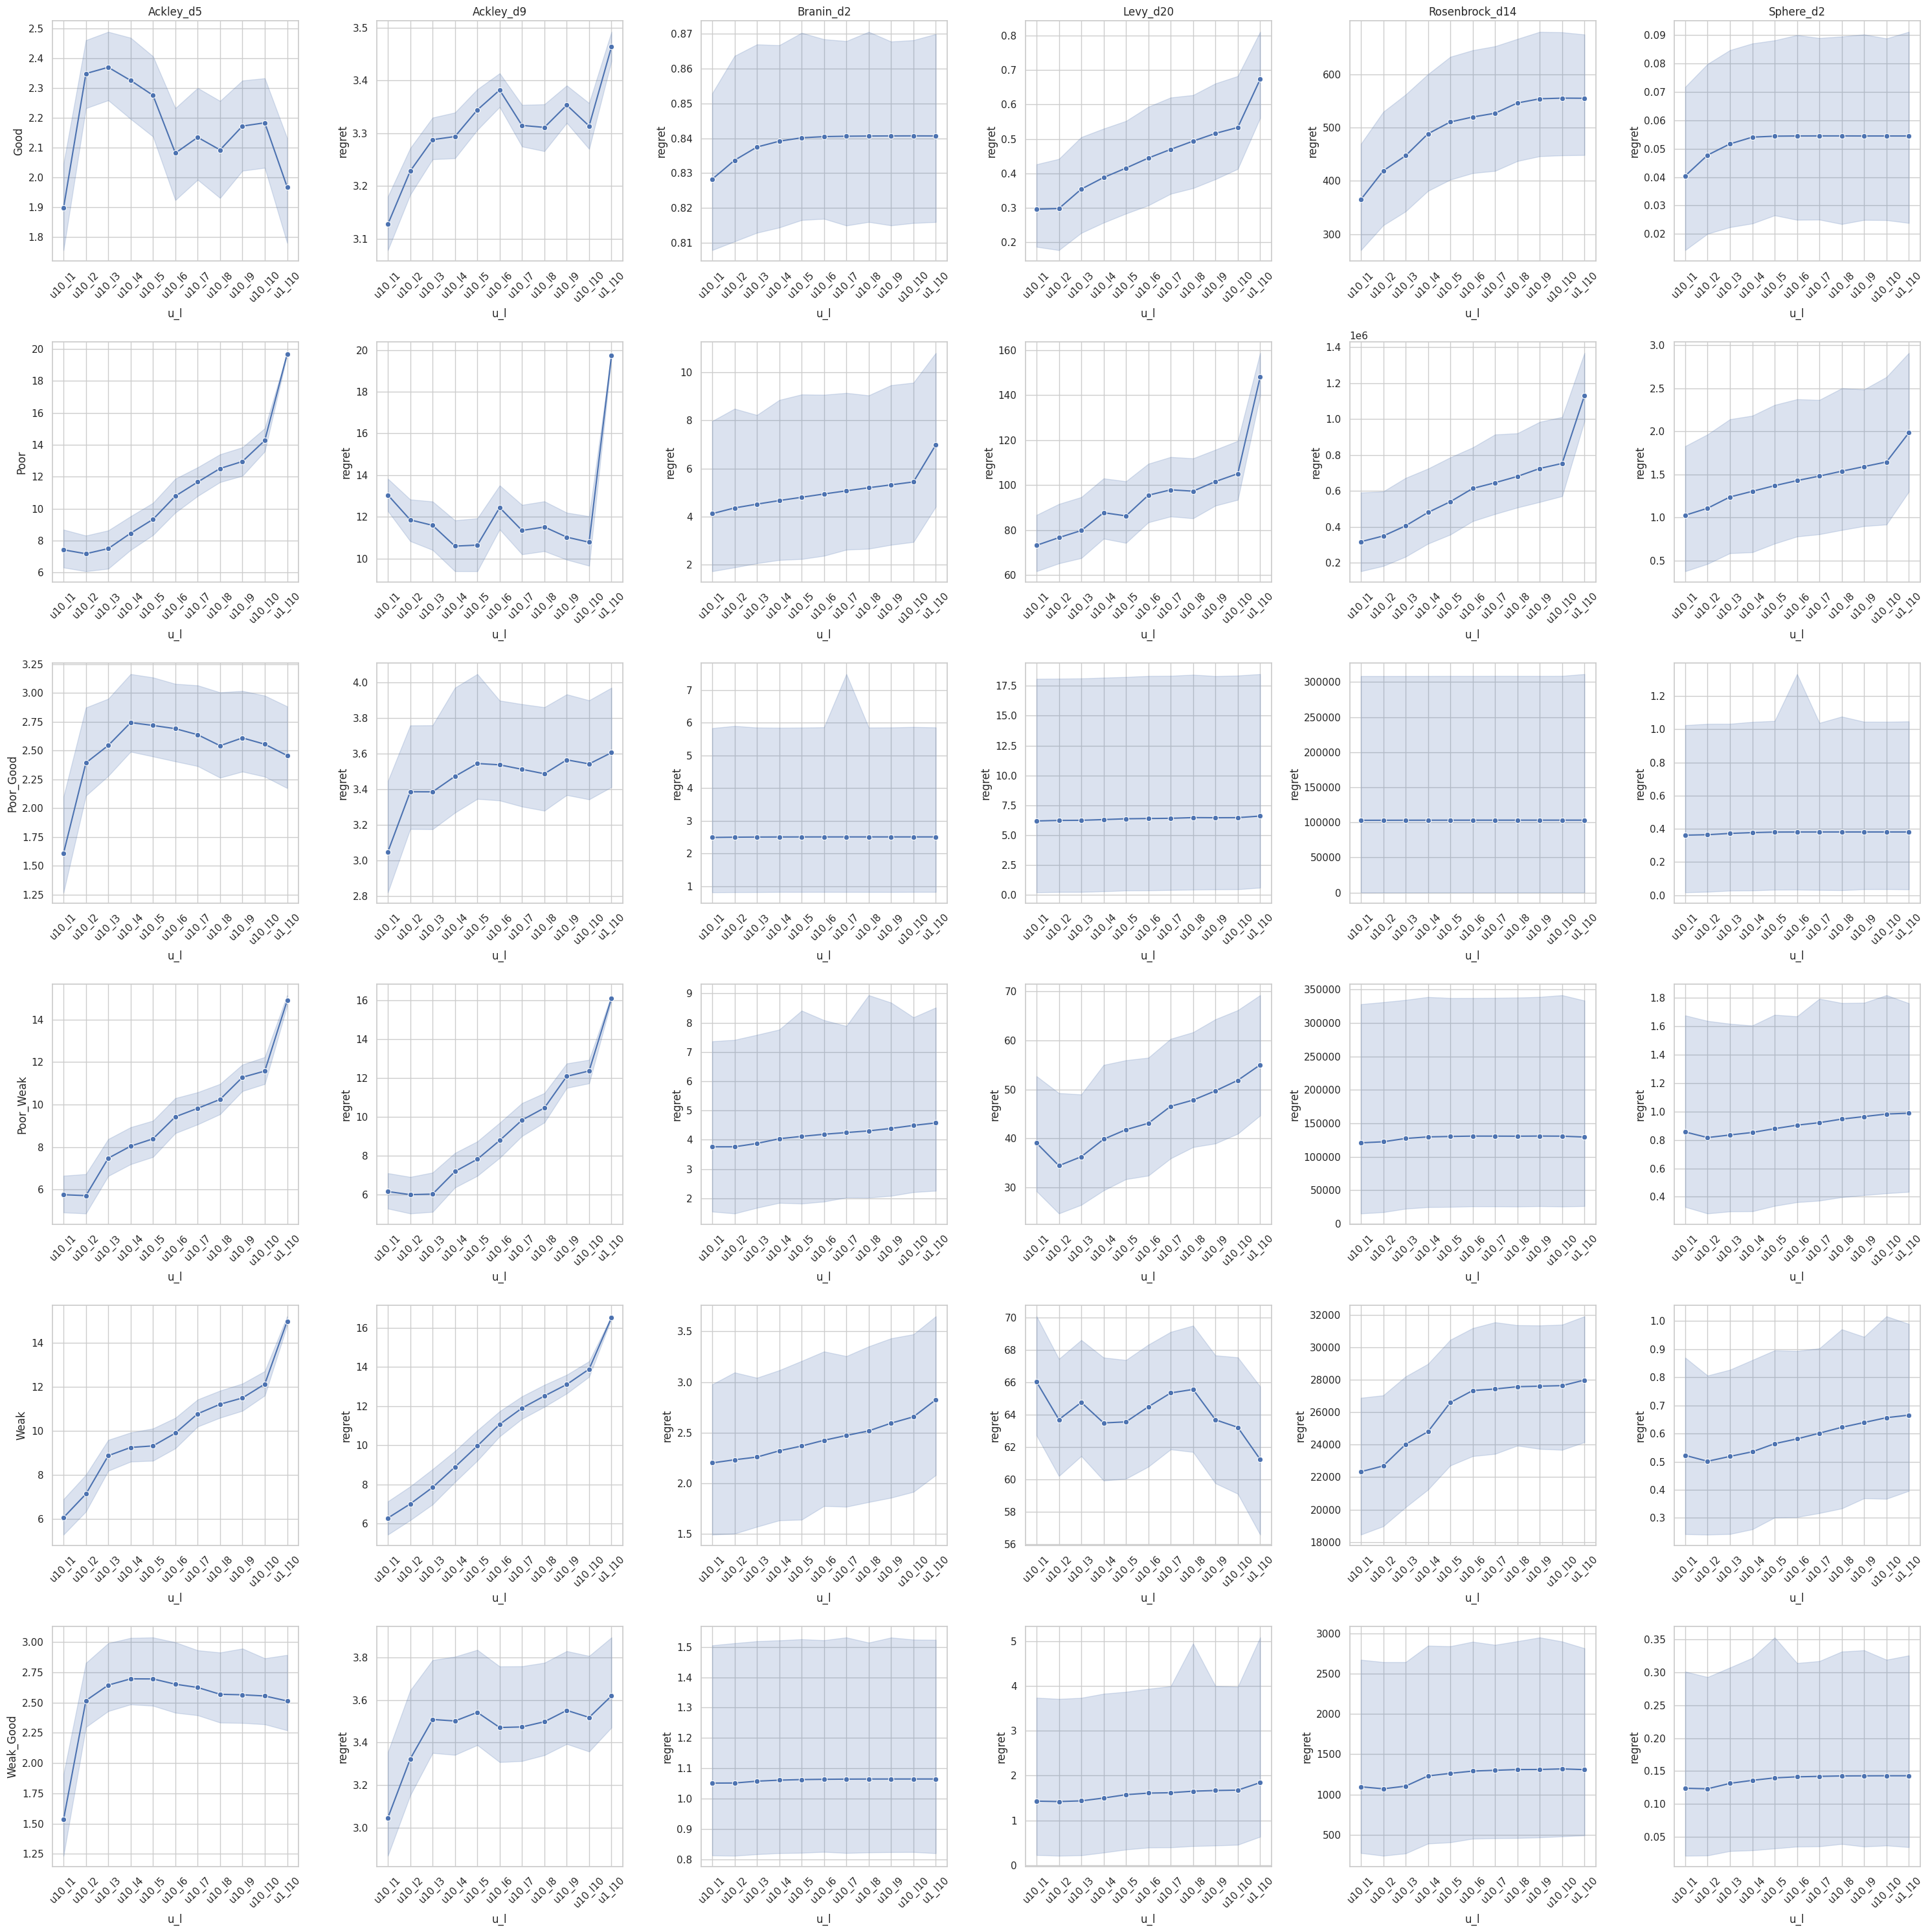

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
data_path = os.path.join("data", "ablation_studies", "all_results.csv")
data = pd.read_csv(data_path)

# Removing the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in data.columns:
    data.drop(columns=['Unnamed: 0'], inplace=True)

# data_melted is the DataFrame containing the melted data with 'Function', 'Hypotheses', 'u_l', and 'regret' columns
data_melted = data.melt(
    id_vars=['Function', 'Hypotheses'], var_name='u_l', value_name='regret')

# Getting unique hypothesis mixtures and functions
hypothesis_mixtures = data_melted['Hypotheses'].unique()
unique_functions = data_melted['Function'].unique()
num_mixtures = len(hypothesis_mixtures)
num_functions = len(unique_functions)

# Setting up the grid plot
fig, axes = plt.subplots(num_mixtures, num_functions,
                         figsize=(5 * num_functions, 5 * num_mixtures))

# Looping through each function and hypothesis mixture to create the plots
for i, func in enumerate(unique_functions):
    for j, hypothesis in enumerate(hypothesis_mixtures):
        sns.lineplot(ax=axes[j, i],
                     data=data_melted[(data_melted['Function'] == func) & (
                         data_melted['Hypotheses'] == hypothesis)],
                     x='u_l', y='regret', marker='o')
        if j == 0:
            axes[j, i].set_title(func)
        if i == 0:
            axes[j, i].set_ylabel(hypothesis)
        # axes[j, i].set_yscale('log')
        axes[j, i].tick_params(axis='x', rotation=45)
        axes[j, i].grid(True)

plt.tight_layout()
plt.show()

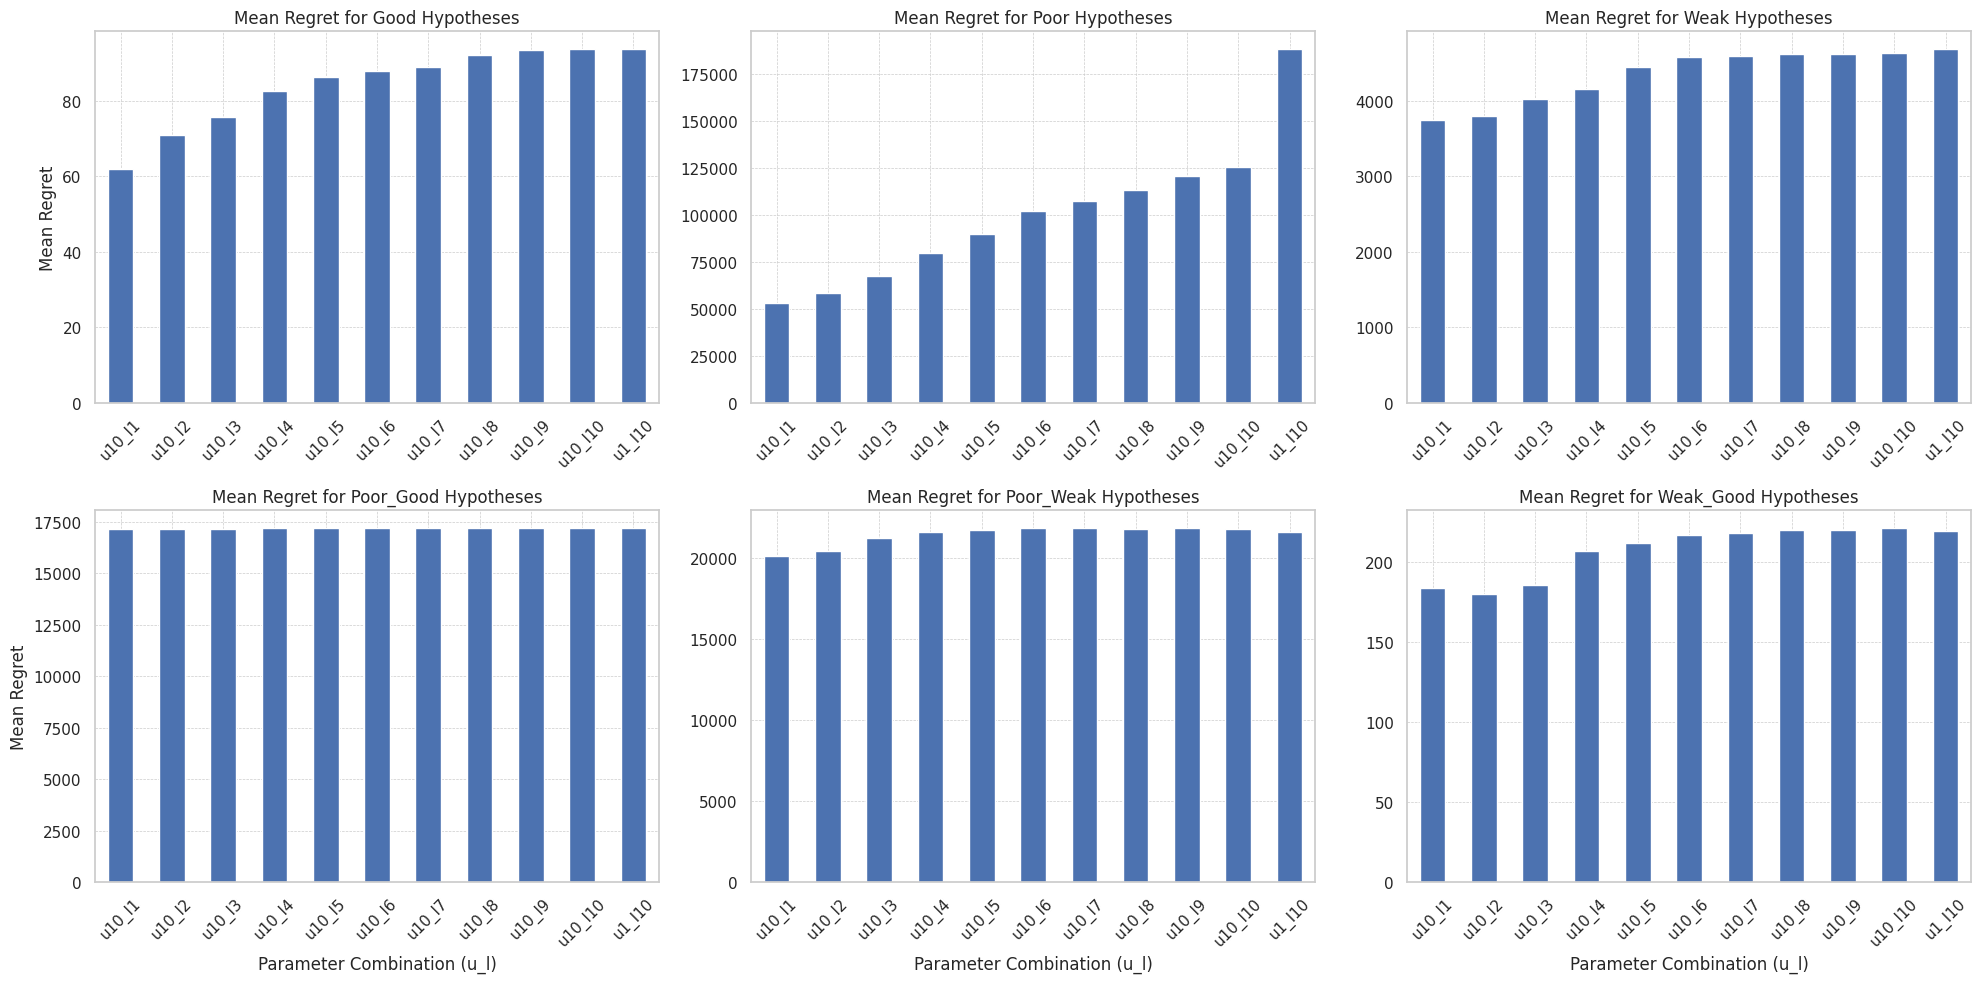

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Load the dataset
data_path = os.path.join("data", "ablation_studies", "all_results.csv")
data = pd.read_csv(data_path)

# Define the hypothesis mixtures
hypothesis_mixtures = ['Good', 'Poor', 'Weak',
                       'Poor_Good', 'Poor_Weak', 'Weak_Good']

# Set up the plot
plt.figure(figsize=(20, 10))
plot_number = 1

for hypothesis in hypothesis_mixtures:
    # Filter data for the current hypothesis
    hypothesis_data = data[data['Hypotheses'] == hypothesis].drop(
        columns=['Function', 'Hypotheses', 'Unnamed: 0'])

    # Calculate mean regret for each parameter combination
    mean_regret = hypothesis_data.mean()

    # Create a subplot for each hypothesis mixture
    ax = plt.subplot(2, 3, plot_number)
    mean_regret.plot(kind='bar', ax=ax)
    plt.title(f'Mean Regret for {hypothesis} Hypotheses')
    plt.xticks(rotation=45)
    if plot_number >= 4:
        plt.xlabel('Parameter Combination (u_l)')
    if plot_number == 1 or plot_number == 4:
        plt.ylabel('Mean Regret')
    ax.set_axisbelow(True)  # Set the grid lines behind the bars
    # Add grid to the plot behind the bars
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    plot_number += 1

plt.tight_layout()
plt.show()

In [21]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Load the dataset
data_path = os.path.join("data", "ablation_studies", "all_results.csv")
data = pd.read_csv(data_path)


# Melt the dataframe for analysis
melted_data = data.melt(
    id_vars=['Function', 'Hypotheses'], var_name='Parameters', value_name='Regret')

# Unique hypothesis mixtures
hypothesis_mixtures = data['Hypotheses'].unique()

# Kruskal-Wallis Test for each hypothesis mixture
kruskal_wallis_results = {}
for hypothesis in hypothesis_mixtures:
    hypothesis_data_kw = melted_data[melted_data['Hypotheses'] == hypothesis]
    groups = [group['Regret'].values for name,
              group in hypothesis_data_kw.groupby('Parameters')]
    kruskal_statistic, kruskal_p_value = stats.kruskal(*groups)
    kruskal_wallis_results[hypothesis] = kruskal_p_value

# Post-hoc pairwise comparisons using Tukey's HSD test for each hypothesis mixture
post_hoc_results = {}
for hypothesis in hypothesis_mixtures:
    hypothesis_data_posthoc = melted_data[melted_data['Hypotheses'] == hypothesis]
    tukey_hsd_result = pairwise_tukeyhsd(endog=hypothesis_data_posthoc['Regret'],
                                         groups=hypothesis_data_posthoc['Parameters'],
                                         alpha=0.05)
    post_hoc_results[hypothesis] = tukey_hsd_result

# Example: Displaying Kruskal-Wallis and Post-hoc test results for the first hypothesis mixture
print("Kruskal-Wallis Test Result for Hypothesis:", hypothesis_mixtures[0])
print(kruskal_wallis_results[hypothesis_mixtures[0]])

print("\nPost-hoc Pairwise Comparisons (Tukey's HSD) for Hypothesis:",
      hypothesis_mixtures[0])
print(post_hoc_results[hypothesis_mixtures[0]].summary())

/usr/local/lib/python3.8/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Kruskal-Wallis Test Result for Hypothesis: Good
1.4405385816885344e-147

Post-hoc Pairwise Comparisons (Tukey's HSD) for Hypothesis: Good
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2 meandiff p-adj   lower    upper  reject
----------------------------------------------------------
Unnamed: 0  u10_l1   9.8478    1.0 -43.4051 63.1007  False
Unnamed: 0 u10_l10  41.6712 0.3041 -11.5817 94.9241  False
Unnamed: 0  u10_l2   18.913 0.9917 -34.3399 72.1659  False
Unnamed: 0  u10_l3  23.6595 0.9529 -29.5934 76.9124  False
Unnamed: 0  u10_l4  30.5078 0.7763 -22.7451 83.7607  False
Unnamed: 0  u10_l5  34.2207 0.6223 -19.0322 87.4736  False
Unnamed: 0  u10_l6  35.7427 0.5539 -17.5102 88.9956  False
Unnamed: 0  u10_l7  36.9283 0.5006 -16.3246 90.1812  False
Unnamed: 0  u10_l8  40.1298 0.3634 -13.1231 93.3827  False
Unnamed: 0  u10_l9  41.4626 0.3118 -11.7903 94.7155  False
Unnamed: 0  u1_l10  41.6411 0.3052 -11.6118  94.894  False
    u10_l1 u10_l10  31.8234  0.725 -